In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [ ]:
# notebook: 01-data-cleaning.ipynb (first cell)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/archive.zip')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape
df.info()
df.describe(include='all').T
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


<Axes: xlabel='Survived', ylabel='count'>

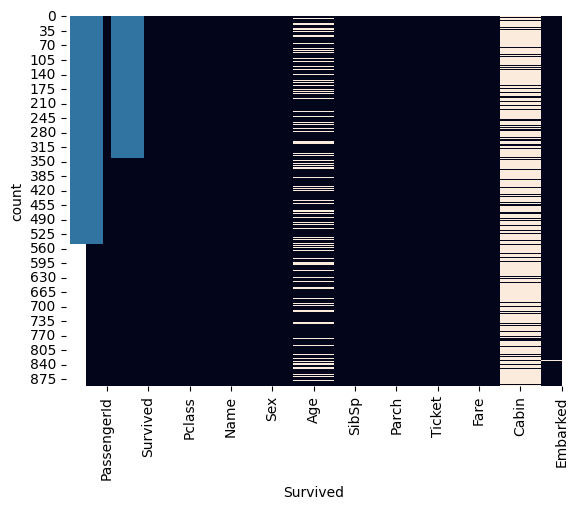

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
sns.countplot(x='Survived', data=df)


In [ ]:
# Age: median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Embarked: mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fare: if any nulls
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Cabin: either drop or extract deck letter
df['Cabin_deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
df.drop(columns=['Cabin'], inplace=True)


In [ ]:
# Title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
# Group rare titles
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [ ]:
# Sex -> binary
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

# One-hot for Embarked and Title (drop_first to avoid multicollinearity)
df = pd.get_dummies(df, columns=['Embarked','Title','Cabin_deck'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Age','Fare','FamilySize']  # adjust as used
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

df = remove_outliers_iqr(df, 'Fare')


In [ ]:
drop_cols = ['PassengerId','Name','Ticket','Survived']  # keep PassengerId if needed separately
X = df.drop(columns=drop_cols)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


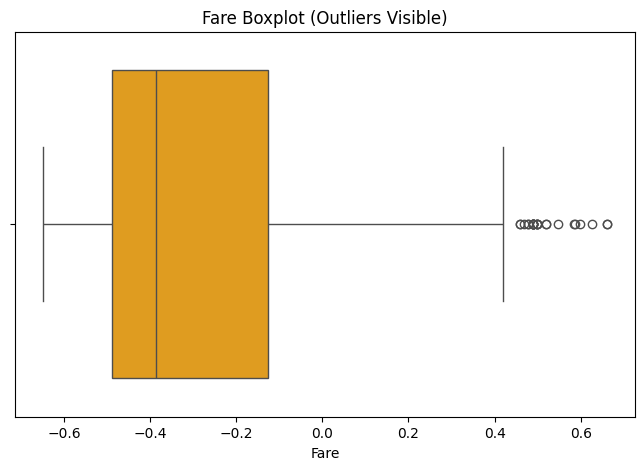

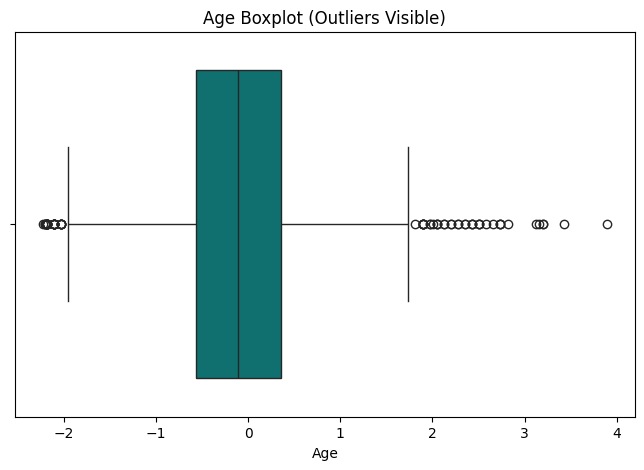

In [ ]:


plt.figure(figsize=(8,5))
sns.boxplot(x=df['Fare'], color="orange")
plt.title("Fare Boxplot (Outliers Visible)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Age'], color="teal")
plt.title("Age Boxplot (Outliers Visible)")
plt.show()


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Remove outliers in Fare
df = remove_outliers_iqr(df, 'Fare')

# If you want to apply to multiple columns
for col in ['Fare', 'Age']:
    df = remove_outliers_iqr(df, col)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
